## Coding

In [1]:
#!pip install -U transformers
#!pip install -U accelerate
#!pip install -U datasets
#!pip install -U bertviz
#!pip install -U umap-learn
#!pip install seaborn --upgrade
#!pip install -U openpyxl
#!pip install huggingface-hub

# Don't do in production. Doing now to keep output clean for understanding


In [2]:
#from huggingface_hub import login

#login()

In [3]:
import warnings
import json
import numpy as np
import pandas as pd
warnings.filterwarnings('ignore')

In [4]:
f = open("complaints-1.json")

# returns JSON object as a dictionary
data = json.load(f)

In [5]:
df=pd.json_normalize(data)

In [6]:
df.head()

,_index,_type,_id,_score,_source.tags,_source.zip_code,_source.complaint_id,_source.issue,_source.date_received,_source.state,...,_source.company_response,_source.company,_source.submitted_via,_source.date_sent_to_company,_source.company_public_response,_source.sub_product,_source.timely,_source.complaint_what_happened,_source.sub_issue,_source.consumer_consent_provided
0,complaint-public-v2,complaint,3211475,0.0,None,90301,3211475,Attempts to collect debt not owed,2019-04-13T12:00:00-05:00,CA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,None,Credit card debt,Yes,,Debt is not yours,Consent not provided
1,complaint-public-v2,complaint,3229299,0.0,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I apprec...,Didn't receive enough information to verify debt,Consent provided
2,complaint-public-v2,complaint,3199379,0.0,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Problem with rewards from credit card,Consent provided
3,complaint-public-v2,complaint,2673060,0.0,None,48066,2673060,Trouble during payment process,2017-09-13T12:00:00-05:00,MI,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2017-09-14T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,Consent not provided
4,complaint-public-v2,complaint,3203545,0.0,None,10473,3203545,Fees or interest,2019-04-05T12:00:00-05:00,NY,...,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-04-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,,Charged too much interest,N/A


In [7]:
df_data = df[['_source.complaint_what_happened','_source.product']]#,'_source.sub_product',]]
df_data.head()

,_source.complaint_what_happened,_source.product
0,,Debt collection
1,Good morning my name is XXXX XXXX and I apprec...,Debt collection
2,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Credit card or prepaid card
3,,Mortgage
4,,Credit card or prepaid card


In [8]:
df_data = df_data.rename(columns={'_source.complaint_what_happened': 'complaint_text', '_source.product': 'category','_source.sub_product': 'sub_category'})
df_data.head()

,complaint_text,category
0,,Debt collection
1,Good morning my name is XXXX XXXX and I apprec...,Debt collection
2,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Credit card or prepaid card
3,,Mortgage
4,,Credit card or prepaid card


In [9]:
df_data.complaint_text.isnull().sum()

0

In [10]:
df_data.category.isnull().sum()

0

In [11]:
df_data = df_data.dropna()

In [12]:
df_data.isnull().sum()

complaint_text    0
category          0
dtype: int64

In [13]:
len(df_data)

78313

In [14]:
len(df_data[df_data['complaint_text']==''])

57241

In [15]:
df_data[df_data['complaint_text']==''] = np.nan
df_data.complaint_text.isnull().sum()

57241

In [16]:
df_data = df_data[~df_data['complaint_text'].isnull()]
df_data.complaint_text.isnull().sum()

0

In [17]:
len(df_data)

21072

In [18]:
unique_values = df_data['category'].unique()
print(unique_values)

['Debt collection' 'Credit card or prepaid card'
 'Credit reporting, credit repair services, or other personal consumer reports'
 'Checking or savings account' 'Vehicle loan or lease'
 'Money transfer, virtual currency, or money service' 'Mortgage'
 'Student loan' 'Consumer Loan'
 'Payday loan, title loan, or personal loan' 'Bank account or service'
 'Credit card' 'Credit reporting' 'Money transfers' 'Prepaid card'
 'Other financial service' 'Payday loan']


In [19]:
category_to_label = {category: idx for idx, category in enumerate(unique_values)}

# Add the new 'label' column
df_data['label'] = df_data['category'].map(category_to_label)

df_data

,complaint_text,category,label
1,Good morning my name is XXXX XXXX and I apprec...,Debt collection,0
2,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Credit card or prepaid card,1
10,Chase Card was reported on XX/XX/2019. However...,"Credit reporting, credit repair services, or o...",2
11,"On XX/XX/2018, while trying to book a XXXX XX...","Credit reporting, credit repair services, or o...",2
14,my grand son give me check for {$1600.00} i de...,Checking or savings account,3
...,...,...,...
78303,After being a Chase Card customer for well ove...,Credit card or prepaid card,1
78309,"On Wednesday, XX/XX/XXXX I called Chas, my XXX...",Credit card or prepaid card,1
78310,I am not familiar with XXXX pay and did not un...,Checking or savings account,3
78311,I have had flawless credit for 30 yrs. I've ha...,Credit card or prepaid card,1


In [20]:
unique_label_values = df_data['label'].unique()
print(unique_label_values)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


In [21]:
df_data.shape

df_data['label'].value_counts()

label
1     5039
3     4290
6     3246
2     2087
11    2070
10    1650
0      955
5      797
4      403
8      240
7      140
13      56
9       44
12      38
15       9
14       7
16       1
Name: count, dtype: int64

In [22]:
label_mapping = {1: 0, 3: 1, 6: 2}

# Extract rows with the specified labels
labels_to_extract = [1,3,6]

df = df_data[df_data['label'].isin(labels_to_extract)]

# Update the 'label' column using the mapping
df['label'] = df['label'].map(label_mapping)

# Display the updated DataFrame
print(df.head())

                                       complaint_text  \
2   I upgraded my XXXX XXXX card in XX/XX/2018 and...   
14  my grand son give me check for {$1600.00} i de...   
17  With out notice J.P. Morgan Chase restricted m...   
23  I have a Chase credit card which is incorrectl...   
27  I opened an account with chase bank on XXXX an...   

                       category  label  
2   Credit card or prepaid card      0  
14  Checking or savings account      1  
17  Checking or savings account      1  
23  Credit card or prepaid card      0  
27  Checking or savings account      1  


In [23]:
df.head()

,complaint_text,category,label
2,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Credit card or prepaid card,0
14,my grand son give me check for {$1600.00} i de...,Checking or savings account,1
17,With out notice J.P. Morgan Chase restricted m...,Checking or savings account,1
23,I have a Chase credit card which is incorrectl...,Credit card or prepaid card,0
27,I opened an account with chase bank on XXXX an...,Checking or savings account,1


In [24]:
df.shape

df['label'].value_counts()

label
0    5039
1    4290
2    3246
Name: count, dtype: int64

In [25]:
unique_combinations = df[['category', 'label']].value_counts().reset_index()

label2id = dict(zip(unique_combinations['category'], unique_combinations['label']))
print(label2id)


id2label = {value: key for key, value in label2id.items()}
print(id2label)

{'Credit card or prepaid card': 0, 'Checking or savings account': 1, 'Mortgage': 2}
{0: 'Credit card or prepaid card', 1: 'Checking or savings account', 2: 'Mortgage'}


In [26]:
df.to_csv('category_classifier.csv', index=False)

## Dataset Analysis

In [27]:
import matplotlib.pyplot as plt

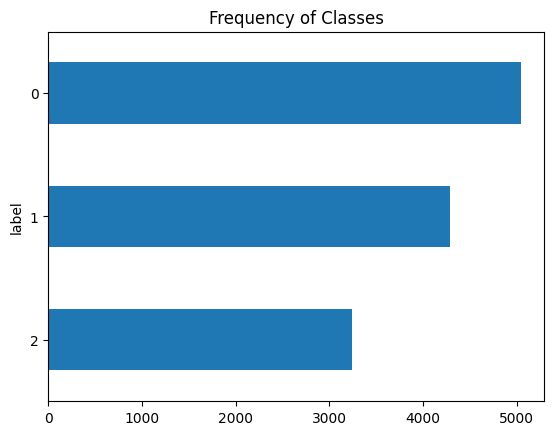

In [28]:
label_counts = df['label'].value_counts(ascending=True)
label_counts.plot.barh()
plt.title("Frequency of Classes")
plt.show()

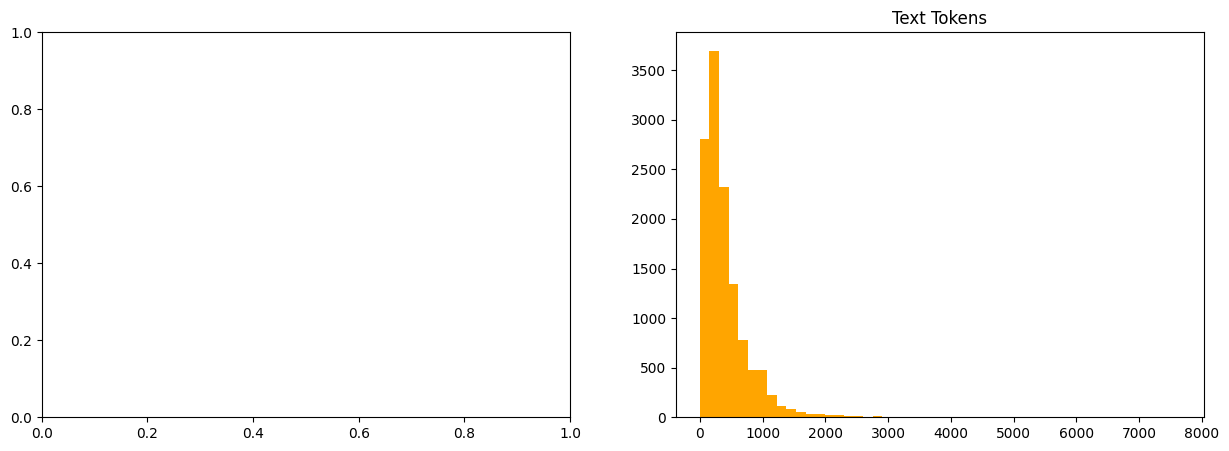

In [29]:
# 1.5 tokens per word on average
#df['title_tokens'] = df['complaint_title'].apply(lambda x: len(x.split())*1.5)
df['text_tokens'] = df['complaint_text'].apply(lambda x: len(x.split())*1.5)


fig, ax = plt.subplots(1,2, figsize=(15,5))

#ax[0].hist(df['title_tokens'], bins=50, color = 'skyblue')
#ax[0].set_title("Title Tokens")

ax[1].hist(df['text_tokens'], bins=50, color = 'orange')
ax[1].set_title("Text Tokens")

plt.show()

## Data Loader and Train Test Split

In [30]:
from sklearn.model_selection import train_test_split

# 70% for training, 20% test, 10% validation
train, test = train_test_split(df, test_size=0.2, stratify=df['label'])
test, validation = train_test_split(test, test_size=1/3, stratify=test['label'])

train.shape, test.shape, validation.shape, df.shape



((10060, 4), (1676, 4), (839, 4), (12575, 4))

In [31]:
from datasets import Dataset, DatasetDict

dataset = DatasetDict(
    {
        "train": Dataset.from_pandas(train, preserve_index=False),
        "test": Dataset.from_pandas(test, preserve_index=False),
        "validation": Dataset.from_pandas(validation, preserve_index=False)
    }
)

dataset

DatasetDict({
    train: Dataset({
        features: ['complaint_text', 'category', 'label', 'text_tokens'],
        num_rows: 10060
    })
    test: Dataset({
        features: ['complaint_text', 'category', 'label', 'text_tokens'],
        num_rows: 1676
    })
    validation: Dataset({
        features: ['complaint_text', 'category', 'label', 'text_tokens'],
        num_rows: 839
    })
})

In [32]:
dataset['train']

Dataset({
    features: ['complaint_text', 'category', 'label', 'text_tokens'],
    num_rows: 10060
})

In [33]:
#dataset['train']['category']

## Data Tokenization

In [34]:
from transformers import AutoTokenizer

text = "Machine learning is awesome!! Thanks KGP Talkie."

model_ckpt = "distilbert-base-uncased"
distilbert_tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
distilbert_tokens = distilbert_tokenizer.tokenize(text)

#model_ckpt = "google/mobilebert-uncased"
#mobilebert_tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
#mobilebert_tokens = mobilebert_tokenizer.tokenize(text)

#model_ckpt = "huawei-noah/TinyBERT_General_4L_312D"
#tinybert_tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
#tinybert_tokens = tinybert_tokenizer.tokenize(text)


In [35]:
distilbert_tokenizer#, mobilebert_tokenizer, tinybert_tokenizer

DistilBertTokenizerFast(name_or_path='distilbert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=False),  added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}

In [36]:
def tokenize(batch):
    temp = distilbert_tokenizer(batch['complaint_text'], padding=True, truncation=True)
    return temp

print(tokenize(dataset['train'][:2]))

{'input_ids': [[101, 1045, 3929, 3825, 1996, 5703, 2164, 1996, 2561, 3037, 9883, 1997, 2026, 5252, 4923, 4003, 1999, 22038, 1013, 22038, 1013, 2760, 1012, 2045, 2003, 22038, 20348, 5703, 1012, 2085, 1010, 16545, 5302, 16998, 5252, 2924, 2003, 13003, 2033, 2019, 4469, 3037, 7408, 1006, 5023, 7408, 1007, 2005, 22038, 1013, 22038, 1013, 2760, 2000, 22038, 1013, 22038, 1013, 2760, 1012, 2027, 2106, 2025, 11582, 2033, 2055, 1996, 4469, 3037, 7408, 2077, 7079, 2125, 1996, 5703, 1998, 5494, 1996, 4070, 1012, 1045, 2052, 2066, 1996, 1057, 1012, 1055, 1012, 2533, 1997, 9837, 2030, 2178, 2231, 4034, 1006, 2008, 2003, 1999, 3715, 1997, 8822, 1057, 1012, 1055, 1012, 5085, 9053, 1007, 2000, 8556, 16545, 5302, 16998, 5252, 2924, 1005, 1055, 6078, 1998, 3343, 2005, 2037, 3037, 9883, 1998, 2060, 9883, 1012, 8817, 1997, 4841, 1006, 2040, 2024, 2066, 2033, 1007, 2089, 2031, 2042, 5338, 2007, 4469, 5023, 3037, 3446, 9883, 1012, 1045, 3246, 2017, 2052, 8556, 16545, 5302, 16998, 5252, 2924, 1999, 12362, 19

In [37]:
encoded_dataset = dataset.map(tokenize, batch_size=None, batched=True)

Map:   0%|          | 0/10060 [00:00<?, ? examples/s]

Map:   0%|          | 0/1676 [00:00<?, ? examples/s]

Map:   0%|          | 0/839 [00:00<?, ? examples/s]

In [38]:
encoded_dataset

DatasetDict({
    train: Dataset({
        features: ['complaint_text', 'category', 'label', 'text_tokens', 'input_ids', 'attention_mask'],
        num_rows: 10060
    })
    test: Dataset({
        features: ['complaint_text', 'category', 'label', 'text_tokens', 'input_ids', 'attention_mask'],
        num_rows: 1676
    })
    validation: Dataset({
        features: ['complaint_text', 'category', 'label', 'text_tokens', 'input_ids', 'attention_mask'],
        num_rows: 839
    })
})

In [39]:
import torch
#torch.cuda.set_device(1)
torch.cuda.current_device()

0

## Model Building

In [40]:
from transformers import AutoModelForSequenceClassification, AutoConfig
import torch

label2id = label2id

id2label = id2label

model_ckpt = "distilbert-base-uncased"
# model_ckpt = "google/mobilebert-uncased"
# model_ckpt = "huawei-noah/TinyBERT_General_4L_312D"


num_labels = len(label2id)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

config = AutoConfig.from_pretrained(model_ckpt, label2id=label2id, id2label=id2label)
model = AutoModelForSequenceClassification.from_pretrained(model_ckpt, config=config).to(device)




Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [41]:
model.config

DistilBertConfig {
  "_attn_implementation_autoset": true,
  "_name_or_path": "distilbert-base-uncased",
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "id2label": {
    "0": "Credit card or prepaid card",
    "1": "Checking or savings account",
    "2": "Mortgage"
  },
  "initializer_range": 0.02,
  "label2id": {
    "Checking or savings account": 1,
    "Credit card or prepaid card": 0,
    "Mortgage": 2
  },
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "transformers_version": "4.46.2",
  "vocab_size": 30522
}

## Model Fine-Tuning

In [42]:
#!pip install evaluate

In [43]:
# Build compute metrics function
# !pip install evaluate
import evaluate
import numpy as np

accuracy = evaluate.load("accuracy")

def compute_metrics_evaluate(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return accuracy.compute(predictions=predictions, references=labels)

In [44]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)

    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)

    return {"accuracy": acc, "f1": f1}

In [48]:
from transformers import TrainingArguments

batch_size = 16
training_dir = "train_dir"

training_args = TrainingArguments(
                                  output_dir=training_dir,
                                  overwrite_output_dir = True,
                                  num_train_epochs = 10,
                                  learning_rate = 2e-5,
                                  per_device_train_batch_size = batch_size,
                                  per_device_eval_batch_size = batch_size,
                                  weight_decay = 0.01,
                                  evaluation_strategy = 'epoch',
)



In [49]:
from transformers import Trainer

#trainer = Trainer(
#    model=model,
#    compute_metrics=compute_metrics_evaluate,
#    train_dataset=encoded_dataset['train'],
#    eval_dataset=encoded_dataset['validation'],
#    tokenizer=distilbert_tokenizer
#)

trainer = Trainer(
                   model=model,
                   args=training_args,
                   compute_metrics=compute_metrics,
                   train_dataset = encoded_dataset['train'],
                   eval_dataset = encoded_dataset['validation'],
                   tokenizer = distilbert_tokenizer
)

In [50]:
model.to(device)

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): DistilBertSdpaAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)


In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.322800,0.198176,0.932062,0.931978
2,0.174100,0.191919,0.935638,0.935542
3,0.138400,0.211695,0.945173,0.945065


In [ ]:
dataset

In [ ]:
encoded_dataset

## Model Evaluation

In [ ]:
preds_output = trainer.predict(encoded_dataset['test'])


In [ ]:
#preds_output
preds_output.metrics

In [ ]:
y_pred = np.argmax(preds_output.predictions, axis=1)
y_true = encoded_dataset['test'][:]['label']

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred, target_names=list(label2id)))

## Benchmarking

In [ ]:
# use sklearn to build compute metrics
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)

    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)

    return {"accuracy": acc, "f1": f1}

In [ ]:
model_dict = {
    "bert-base": "bert-base-uncased",
    "distilbert": "distilbert-base-uncased",
    "mobilebert": "google/mobilebert-uncased",
    "tinybert": "huawei-noah/TinyBERT_General_4L_312D"
}

def train_model(model_name):
    model_ckpt = model_dict[model_name]
    tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
    config = AutoConfig.from_pretrained(model_ckpt, label2id=label2id, id2label=id2label)
    model = AutoModelForSequenceClassification.from_pretrained(model_ckpt, config=config).to(device)

    def local_tokenizer(batch):
        temp = tokenizer(batch['title'], padding=True, truncation=True)
        return temp

    encoded_dataset = dataset.map(local_tokenizer, batched=True, batch_size=None)

    trainer = Trainer(
                model=model,
                compute_metrics=compute_metrics,
                train_dataset=encoded_dataset['train'],
                eval_dataset=encoded_dataset['validation'],
                tokenizer=tokenizer
            )

    trainer.train()

    preds = trainer.predict(encoded_dataset['test'])

    return preds.metrics


import time
model_performance = {}
for model_name in model_dict:
    print("\n\n")
    print("Training Model: ", model_name)

    start = time.time()
    result = train_model(model_name)
    end = time.time()

    model_performance[model_name] = {model_name:result, "time taken": end-start}

In [ ]:
model_performance

In [ ]:
#   'time taken': 679.7081322669983},
#   'time taken': 365.0743615627289},
#   'time taken': 902.2547216415405},
# 'time taken': 107.46117568016052



# Model Load and Save

In [ ]:
trainer.save_model("ticket_classification")

In [ ]:
from transformers import pipeline

classifier = pipeline('text-classification', model= 'ticket_classification', device='cuda')


In [ ]:
classifier(f" i have not been able to open an account with any banks due to inaccurate fraud statements from 2017 reported from XXXX XXXX XXXX, im a victim of fraud my identity was stolen since the year of 2017 as a XXXX year old looking to start a business i need an bank account and fraud identity that was stolen from my old bank JPchase bank is inaccurate. ")